In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [11]:
#Generate a test signal, a 2 Vrms sine wave at 50Hz corrupted by 0.001 V**2/Hz of white noise sampled at 1024 Hz.
fs = 1024

N = 10*fs

nperseg = 512

amp = 2 * np.sqrt(2)

noise_power = 0.001 * fs / 2

time = np.arange(N) / float(fs)

carrier = amp * np.sin(2*np.pi*50*time)

noise = rng.normal(scale=np.sqrt(noise_power),

                   size=time.shape)

x = carrier + noise

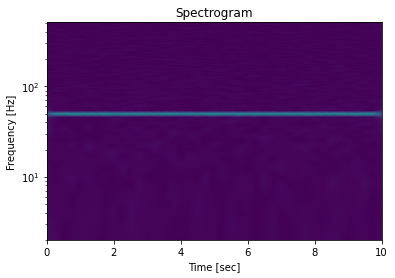

In [12]:
#Compute the STFT, and plot its magnitude
f, t, Zxx = signal.stft(x, fs=fs, nperseg=nperseg)

plt.figure()

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.ylim([f[1], f[-1]])

plt.title('Spectrogram')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.yscale('log')

plt.show()

In [13]:
#Zero the components that are 10% or less of the carrier magnitude, then convert back to a time series via inverse STFT
Zxx = np.where(np.abs(Zxx) >= amp/10, Zxx, 0)

_, xrec = signal.istft(Zxx, fs)


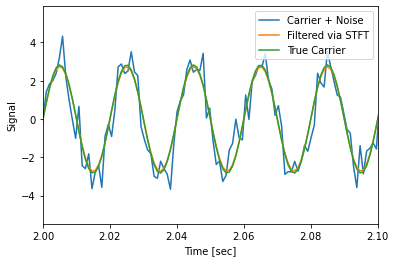

In [14]:
#Compare the cleaned signal with the original and true carrier signals.
plt.figure()

plt.plot(time, x, time, xrec, time, carrier)

plt.xlim([2, 2.1])

plt.xlabel('Time [sec]')

plt.ylabel('Signal')

plt.legend(['Carrier + Noise', 'Filtered via STFT', 'True Carrier'])

plt.show()


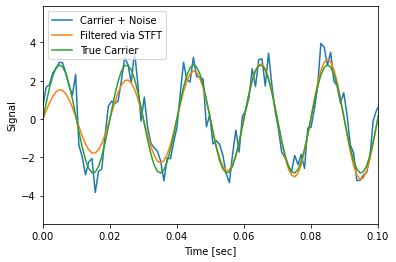

In [15]:
# Cleaned signal does not start as abruptly as the original, since some of the coefficients of the transient were also removed:
plt.figure()

plt.plot(time, x, time, xrec, time, carrier)

plt.xlim([0, 0.1])

plt.xlabel('Time [sec]')

plt.ylabel('Signal')

plt.legend(['Carrier + Noise', 'Filtered via STFT', 'True Carrier'])

plt.show()

